In [1]:
pip install cbio_py numpy seaborn pandas matplotlib

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Note: you may need to restart the kernel to use updated packages.


In [2]:
from cbio_py import cbio_mod as cb
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns

In [5]:
#this is a funcction that searches for a specific keyword in the study name and returns the studies from a list of studies that have that name
def return_study_list_match(studies, keyword):
    study_list = []
    for study in studies:
        if keyword in study['studyId']:
            study_list.append(study)
    return study_list

#This function looks over a list of dictionaries and returns the values of of clinicalattributeId for a specific value
def clincial_attr_ID_value_finder(clinical_data_in_study, clinical_attribute_value):
    clinical_attributes = []
    for clinical_data in clinical_data_in_study:
        if clinical_data['clinicalAttributeId'] == clinical_attribute_value:
            clinical_attributes.append(clinical_data['value'])
    return clinical_attributes

#this function looks up all of the clinical data from a list of studies and then concatenates the data into a single list of clinical
#attribute dictionaries
def return_all_clinical_data_in_studies(studies):
    clinical_data_in_study = []
    for study in studies:
        clinical_data_in_study.extend(cb.getAllClinicalDataInStudy(study['studyId']))
    return clinical_data_in_study

#this function take clinical attributeID and returns the dictiories for that clinical attribute from a list of clinical attributes
def return_clinical_attribute_from_list(clinical_attributes, clinical_attribute_ID):
    clinical_attribute_list = []
    for clinical_attribute in clinical_attributes:
        if clinical_attribute['clinicalAttributeId'] == clinical_attribute_ID:
            clinical_attribute_list.append(clinical_attribute)
    return clinical_attribute_list

#this function returns cancer type sorted by quantile
def quantile_sorter(joined_df, quantile, value):
    dict_list = []
    for i in joined_df.value_x.unique():
        dict_list.append({'cancer_type': i, 'tmb': getattr(joined_df[joined_df['value_x'] == i],value).quantile(quantile)})
    #sort list my tmb value
    sorted_dict_list = sorted(dict_list, key=lambda k: k['tmb'])
    #create a list of cancer types from the sorted dict list
    cancer_types_list = []
    for i in sorted_dict_list:
        cancer_types_list.append(i['cancer_type'])
    # list of cancer types sorted by the 50th percentile tmb value
    return cancer_types_list

In [6]:
#get the total studies
studies = cb.getAllStudies()

In [7]:
#return studies with the words pan_can in the name
studies_pan_can = return_study_list_match(studies, 'pan_can')

In [8]:
#return the clinical attributes from the list of studies
all_clinical_atrributes = return_all_clinical_data_in_studies(studies_pan_can)

In [10]:
#isolate the cancer types and tumor mutational burden values from the list of unordered clinical attribute data
cancer_types = return_clinical_attribute_from_list(all_clinical_atrributes, 'CANCER_TYPE')
tmb_values = return_clinical_attribute_from_list(all_clinical_atrributes, 'TMB_NONSYNONYMOUS')
somatic_status = return_clinical_attribute_from_list(all_clinical_atrributes, 'SOMATIC_STATUS')

In [11]:
#convert to data frames before joining
cancer_types_df = pd.DataFrame(cancer_types)
tmb_values_df = pd.DataFrame(tmb_values)

In [12]:
#this joins the cancer type and tmb values into a single dataframe on patient ID and Sampe ID fields
joined_df = pd.merge(cancer_types_df, tmb_values_df, how='inner',on=['patientId', 'sampleId'])

In [13]:
#see the joined dataset
joined_df.head()

,clinicalAttribute_x,clinicalAttributeId_x,patientId,sampleId,studyId_x,uniquePatientKey_x,uniqueSampleKey_x,value_x,clinicalAttribute_y,clinicalAttributeId_y,studyId_y,uniquePatientKey_y,uniqueSampleKey_y,value_y
0,None,CANCER_TYPE,TCGA-3N-A9WB,TCGA-3N-A9WB-06,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdCOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdCLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,4.733333333
1,None,CANCER_TYPE,TCGA-3N-A9WC,TCGA-3N-A9WC-06,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdDOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdDLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdDOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdDLTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,51
2,None,CANCER_TYPE,TCGA-3N-A9WD,TCGA-3N-A9WD-06,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdEOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdELTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS0zTi1BOVdEOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS0zTi1BOVdELTA2OnNrY21fdGNnYV9wYW5fY2FuX2...,26.33333333
3,None,CANCER_TYPE,TCGA-BF-A1PU,TCGA-BF-A1PU-01,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBVOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBVLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBVOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBVLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,47.7
4,None,CANCER_TYPE,TCGA-BF-A1PV,TCGA-BF-A1PV-01,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBWOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBWLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,Melanoma,None,TMB_NONSYNONYMOUS,skcm_tcga_pan_can_atlas_2018,VENHQS1CRi1BMVBWOnNrY21fdGNnYV9wYW5fY2FuX2F0bG...,VENHQS1CRi1BMVBWLTAxOnNrY21fdGNnYV9wYW5fY2FuX2...,8.466666667


In [14]:
#convert value_y to float
joined_df['value_y'] = joined_df['value_y'].astype(float)
#convert value_x to string
joined_df['value_x'] = joined_df['value_x'].astype(str)

In [15]:
cancer_types_list = quantile_sorter(joined_df, 0.5, 'value_y')

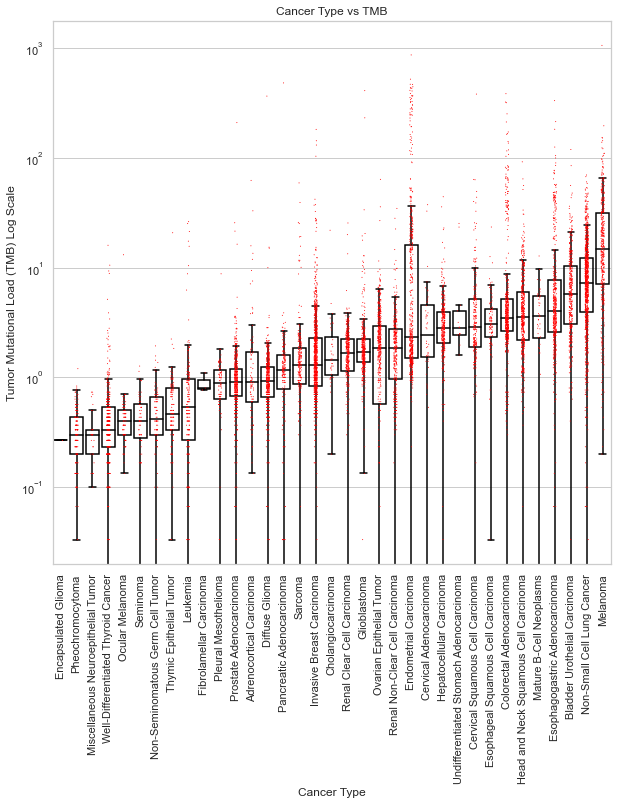

In [17]:
#initialize a graph
sns.set(style="whitegrid")
#this sets the style of the plot
PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'black'},
    'medianprops':{'color':'black'},
    'whiskerprops':{'color':'black'},
    'capprops':{'color':'black'}
}
# Create a boxplot of the data
ax = sns.boxplot(data=joined_df, x="value_x", y="value_y", showfliers=False, **PROPS, order=cancer_types_list)
ax = sns.stripplot(data=joined_df, x="value_x", y="value_y", jitter=0.1, size=1, color='red',order=cancer_types_list)
#set axis to logarithmic
plt.yscale('log')
#change the x axis labels to be on an angle
plt.xticks(rotation=90)
#change plot size
plt.rcParams["figure.figsize"] = (10,10)
#make x labels alphabetical
plt.xticks(rotation=90)
#change the y axis name to be TMB
plt.ylabel('Tumor Mutational Load (TMB) Log Scale')
#change the x axis name to be cancer type
plt.xlabel('Cancer Type')
#change the graph title
plt.title('Cancer Type vs TMB')
#show the graph
plt.show()

In [26]:
cb.getAllClinicalDataOfPatientInStudy('pan_origimed_2020','Patient0863')

[{'clinicalAttribute': None,
  'clinicalAttributeId': 'DIAGNOSIS AGE',
  'patientId': 'Patient0863',
  'sampleId': None,
  'studyId': 'pan_origimed_2020',
  'uniquePatientKey': 'UGF0aWVudDA4NjM6cGFuX29yaWdpbWVkXzIwMjA',
  'uniqueSampleKey': None,
  'value': '46'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'SAMPLE_COUNT',
  'patientId': 'Patient0863',
  'sampleId': None,
  'studyId': 'pan_origimed_2020',
  'uniquePatientKey': 'UGF0aWVudDA4NjM6cGFuX29yaWdpbWVkXzIwMjA',
  'uniqueSampleKey': None,
  'value': '1'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'SEX',
  'patientId': 'Patient0863',
  'sampleId': None,
  'studyId': 'pan_origimed_2020',
  'uniquePatientKey': 'UGF0aWVudDA4NjM6cGFuX29yaWdpbWVkXzIwMjA',
  'uniqueSampleKey': None,
  'value': 'Male'},
 {'clinicalAttribute': None,
  'clinicalAttributeId': 'SMOKE STATUS',
  'patientId': 'Patient0863',
  'sampleId': None,
  'studyId': 'pan_origimed_2020',
  'uniquePatientKey': 'UGF0aWVudDA4NjM6cGFuX29yaWdpbWVkXzIwMj